In [64]:
import os

folder_path = "/Users/ramonjr.comendador/cs198-protein-folding/datasets"

csv_files = [f for f in os.listdir(folder_path) if (f.endswith('.csv') and not f.endswith('5.csv'))]

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [70]:
# FUNCTION FOR INTERPOLATING MATRIX

def interpolate_matrix(matrix, scale_factor):
    interpolated_matrix = scipy.ndimage.zoom(matrix, zoom=scale_factor, order=3)  # cubic interpolation (order=3)
    
    return interpolated_matrix

In [75]:
# CONVERT CSV TO MATRICES

def csv_to_3D_matrix(folder_path, csv_files):
    """
    Converts a list of CSV files into a 3D matrix where each CSV contributes
    a 2D matrix of values based on the 'x', 'y', and 'Value' columns.
    
    Parameters:
    - folder_path (str): The folder where the CSV files are located.
    - csv_files (list): A list of CSV file names to process.
    
    Returns:
    - list: A list of 2D matrices, each corresponding to a CSV file.
    """
    csv_to_3Dmatrix = []

    for csv_file in csv_files:
        # Load the CSV file
        energy_levels = pd.read_csv(os.path.join(folder_path, csv_file), header=None, names=['x', 'y', 'Value'])

        # Get unique x and y values
        unique_x = energy_levels['x'].unique()
        unique_y = energy_levels['y'].unique()

        # Create index mappings for x and y values
        x_index = {val: idx for idx, val in enumerate(unique_x)}
        y_index = {val: idx for idx, val in enumerate(unique_y)}

        # Initialize a matrix filled with NaNs
        matrix = np.full((len(unique_y), len(unique_x)), np.nan)

        # Fill the matrix with values from the CSV
        for _, row in energy_levels.iterrows():
            x_pos = x_index[row['x']]
            y_pos = y_index[row['y']]
            matrix[y_pos, x_pos] = row['Value']

        # Interpolate the matrix by scale factor of 10
        interpolated_matrix = interpolate_matrix(matrix=matrix, scale_factor=10)

        print("Matrix shape: ", matrix.shape)
        print("Interpolated Matrix shape: ", interpolated_matrix.shape)

        # Append the matrix to the list
        csv_to_3Dmatrix.append(interpolated_matrix)
    
    return csv_to_3Dmatrix


In [73]:
# LOCATING LOCAL MINIMA FUNCTION

def find_local_minima(matrix):
    rows, cols = matrix.shape
    local_minima = []

    def get_neighbors(x, y):
        """Get the 8 neighbors of a point (x, y) with wrap-around."""
        neighbors = []
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue
                # Apply wrap-around using modulo operator
                nx = (x + dx) % rows
                ny = (y + dy) % cols
                neighbors.append((nx, ny))
        return neighbors

    def is_local_minimum(x, y):
        """Check if (x, y) is a local minimum considering its neighbors."""
        value = matrix[x, y]
        neighbors = get_neighbors(x, y)
        for nx, ny in neighbors:
            if matrix[nx, ny] < value:
                return False
        return True

    def get_flat_region(x, y, visited):
        """Get all points in the flat region starting from (x, y)."""
        flat_points = [(x, y)]
        visited.add((x, y))
        value = matrix[x, y]
        stack = [(x, y)]
        while stack:
            cx, cy = stack.pop()
            neighbors = get_neighbors(cx, cy)
            for nx, ny in neighbors:
                if (nx, ny) not in visited and matrix[nx, ny] == value:
                    visited.add((nx, ny))
                    flat_points.append((nx, ny))
                    stack.append((nx, ny))
        return flat_points

    visited = set()

    for x in range(rows):
        for y in range(cols):
            if (x, y) in visited:
                continue
            
            if is_local_minimum(x, y):
                flat_region = get_flat_region(x, y, visited)
                if len(flat_region) > 1:
                    # Find the middle point of the flat region
                    flat_region = np.array(flat_region)
                    mid_idx = len(flat_region) // 2
                    middle_point = tuple(flat_region[mid_idx])
                    local_minima.append(middle_point)
                else:
                    local_minima.append((x, y))

    return local_minima

# Example usage with a random matrix
# local_minima = find_local_minima()
# print("Local minima:", local_minima)


Matrix shape:  (25, 25)
Interpolated Matrix shape:  (250, 250)
Matrix shape:  (25, 25)
Interpolated Matrix shape:  (250, 250)
Matrix shape:  (25, 25)
Interpolated Matrix shape:  (250, 250)
Matrix shape:  (25, 25)
Interpolated Matrix shape:  (250, 250)
Matrix shape:  (25, 25)
Interpolated Matrix shape:  (250, 250)
Matrix shape:  (25, 25)
Interpolated Matrix shape:  (250, 250)
Matrix shape:  (25, 25)
Interpolated Matrix shape:  (250, 250)
Matrix shape:  (25, 25)
Interpolated Matrix shape:  (250, 250)
Matrix shape:  (25, 25)
Interpolated Matrix shape:  (250, 250)
Matrix shape:  (25, 25)
Interpolated Matrix shape:  (250, 250)
Matrix shape:  (25, 25)
Interpolated Matrix shape:  (250, 250)
Matrix shape:  (25, 25)
Interpolated Matrix shape:  (250, 250)
Matrix shape:  (25, 25)
Interpolated Matrix shape:  (250, 250)
Matrix shape:  (25, 25)
Interpolated Matrix shape:  (250, 250)
Matrix shape:  (25, 25)
Interpolated Matrix shape:  (250, 250)
Matrix shape:  (25, 25)
Interpolated Matrix shape:  (25

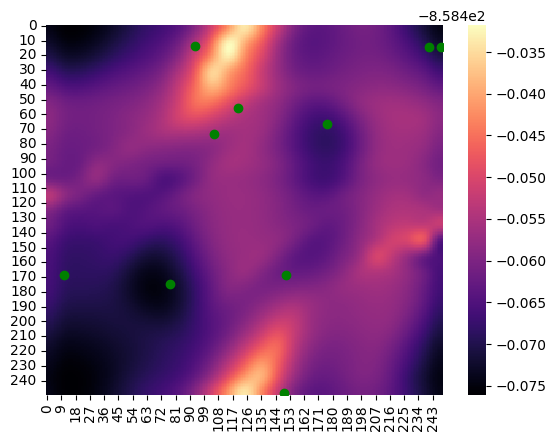

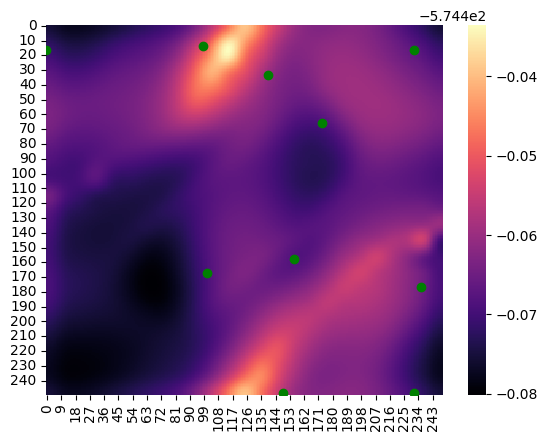

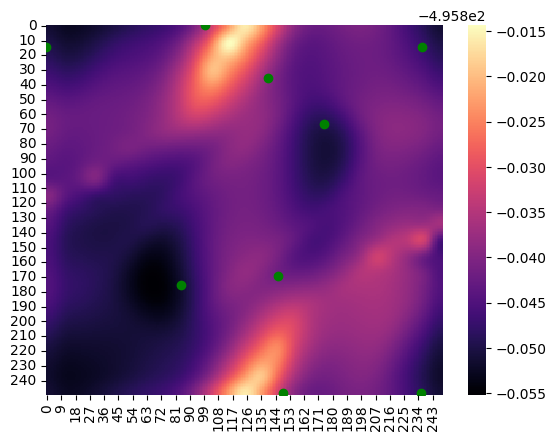

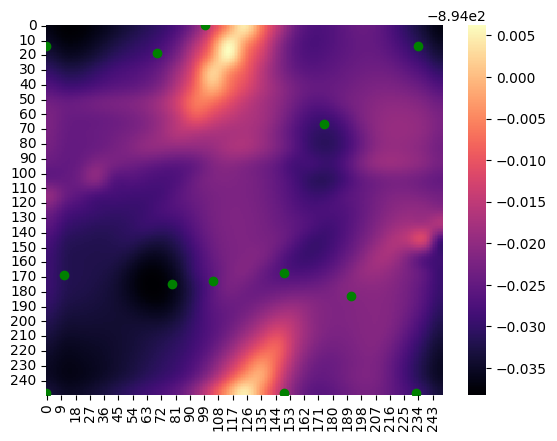

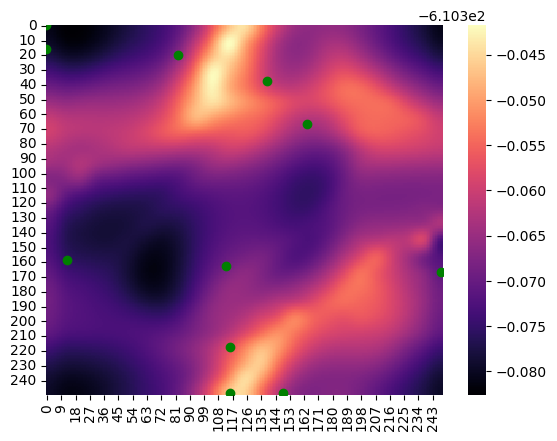

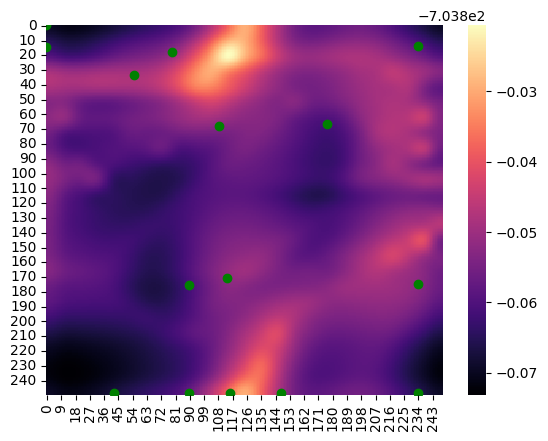

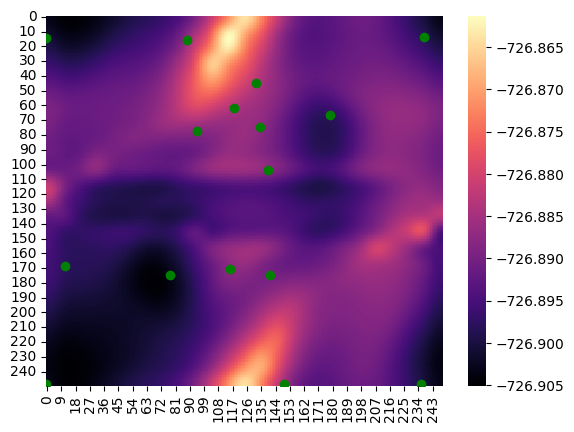

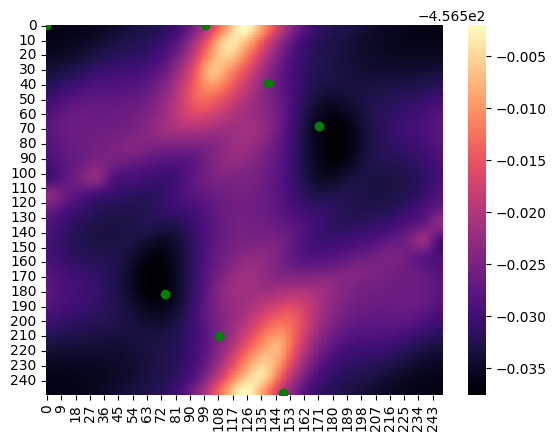

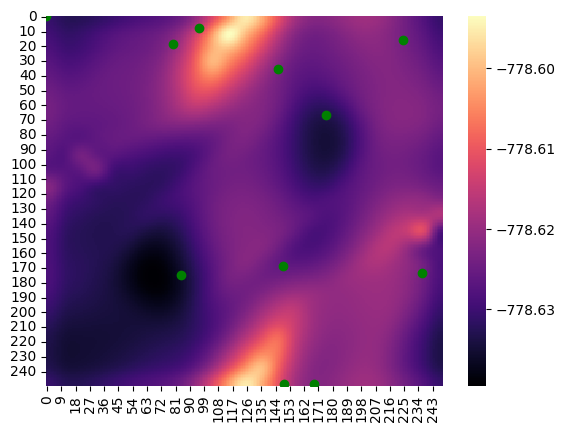

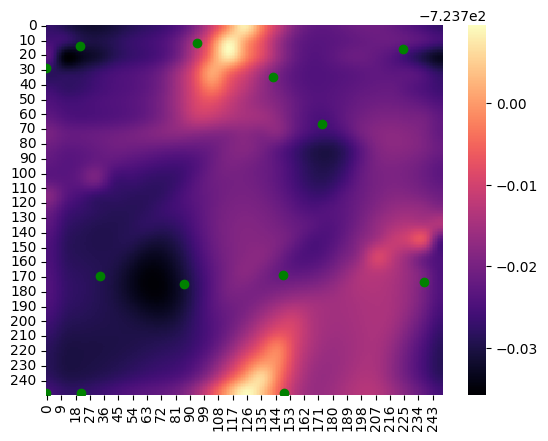

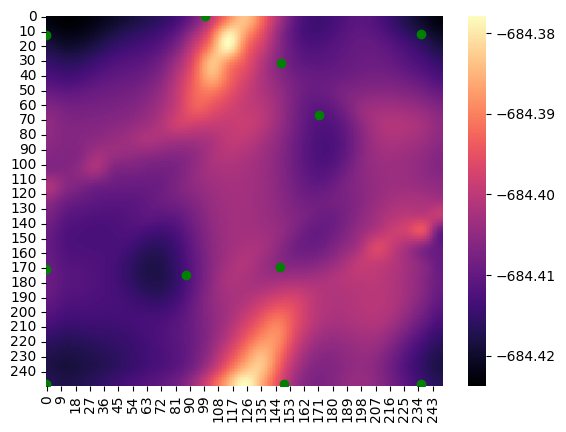

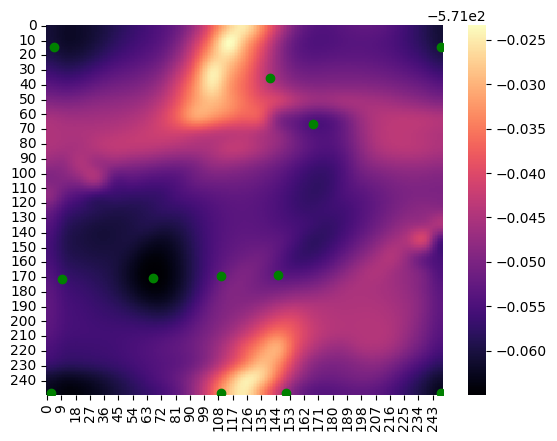

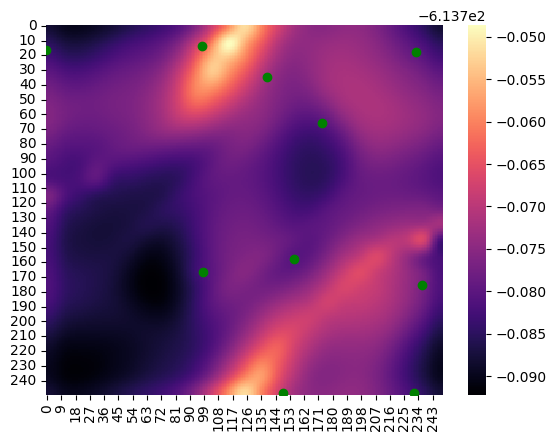

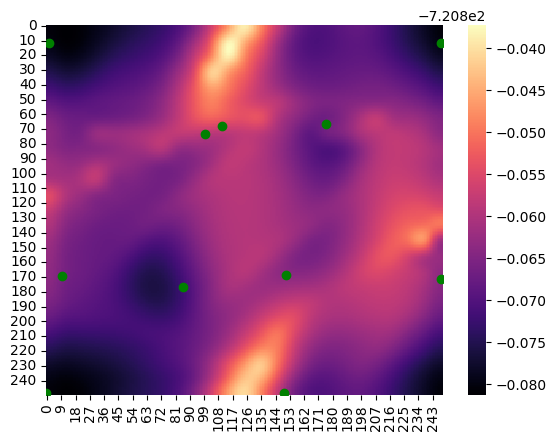

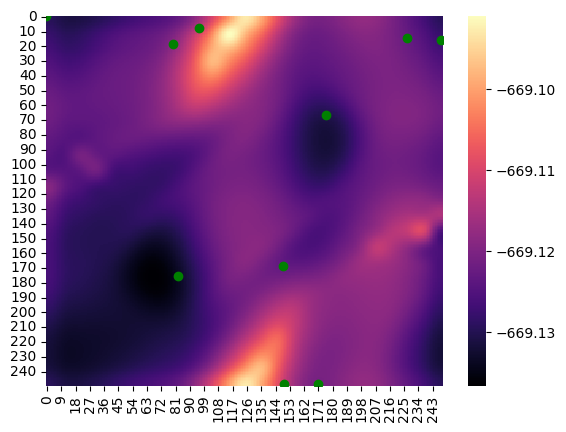

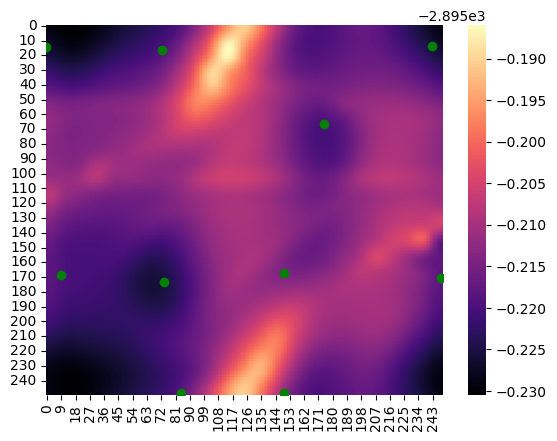

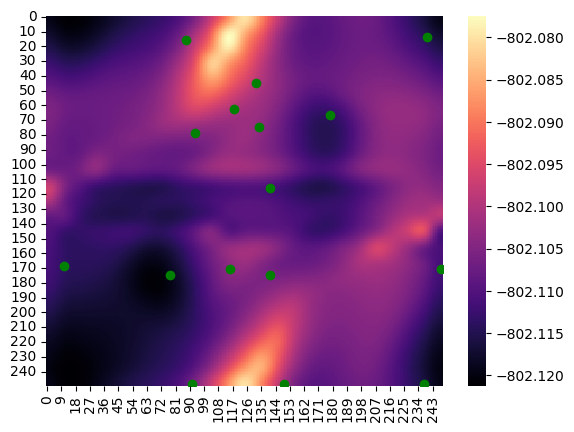

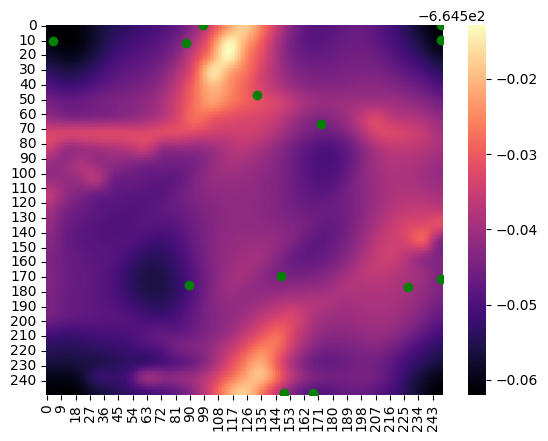

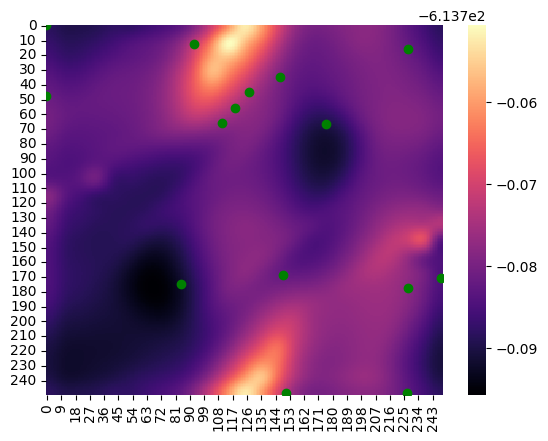

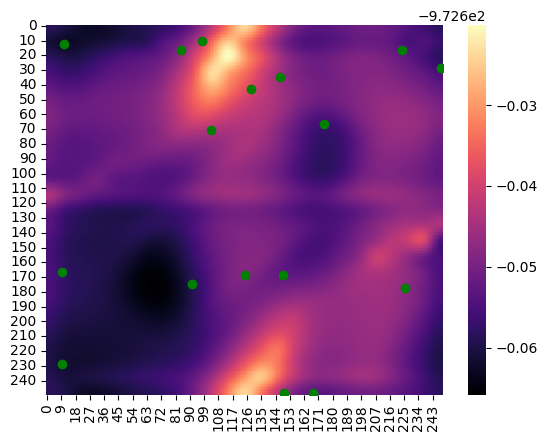

In [78]:
three_dim_matrices = csv_to_3D_matrix(folder_path=folder_path, csv_files=csv_files)
local_minima_per_matrix = [find_local_minima(i) for i in three_dim_matrices]

for i in range(len(three_dim_matrices)):
  # energy_levels = pd.read_csv(os.path.join(folder_path, csv_files[i]), header=None, names=['x', 'y', 'Value'])
  # heat_map = energy_levels.pivot(index='y', columns='x', values='Value')

  sns.heatmap(three_dim_matrices[i], cmap='magma', annot=False, fmt=".1f")
  for j in local_minima_per_matrix[i]:
    plt.scatter(x=j[0], y=j[1], color='green', marker='o')

  plt.show()
